# IMPORT LIBRARIES

In [30]:
import pandas as pd
import numpy as np
from pathlib import Path
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import confusion_matrix
from sklearn.neighbors import KNeighborsClassifier

In [31]:
import python_libraries.data_loading as loadfunc
import python_libraries.utilities as utils
utils.colourblind()

In [32]:
NMETA = 6
# %matplotlib notebook

# LOAD DATA

In [35]:
data_path = f'{Path.cwd().parent}/data/20210716_7_plex/clinical_samples'
figure_path = f'{data_path}/figure_comparison_clinicla_sample'

In [36]:
colormap = [f'C0{i}' for i in range(6)]

In [40]:
df_train = pd.read_csv(f'{data_path}/training_dataset_for_clinical_samples.csv', index_col=0)
df_test = pd.read_csv(f'{data_path}/testing_dataset_for_clinical_samples.csv', index_col=0)

In [41]:
df_train = utils.order_columns(df_train, NMETA)
df_test = utils.order_columns(df_test, NMETA)

In [42]:
combo_dict = {0: 'bottom_six',
              1: 'middle_six',
              2: 'top_six',
              3: 'top_mean',
              4: 'top_min'}

combo_group_id = [0, 1, 2, 3, 4]

In [43]:
df_combination = loadfunc.load_selected_combo(data_selected_path, combo_group_id, combo_dict)
df_combination = df_combination[df_combination.index.isin(['PM7.2151'])]
df_combination

,ADE,C22,CHK,CNL,COC,COV,MER
Label,,,,,,,
PM7.2151,ADE_HEX_06,C22_N_02,CHK_N_06,CNL_N_04,COC_N_04,COV_N_01,MER_N_03


# COMPUTE ACCURACY
Train: gBlocks // Test: Clinical Samples

In [44]:
x_train = df_train.iloc[:, NMETA:]
x_test = df_test_diluted.iloc[:, NMETA:]
y_train = df_train['Assay'].values
y_test = df_test_diluted['Assay'].values

In [45]:
model = KNeighborsClassifier(n_neighbors = 10)

In [46]:
label_number = 7
label = np.unique(y_train)
model.fit(x_train, y_train)
accuracy = model.score(x_test, y_test)
y_pred = model.predict(x_test)
confusionmatrix = np.zeros((label_number, label_number))
confusionmatrix = np.add(confusionmatrix, confusion_matrix(y_test, y_pred, labels=label))
df_confusion_matrix = pd.DataFrame(confusionmatrix, columns=label, index=label)

accuracy

0.9109714584969888

## Confusion matrix at WELL LEVEL

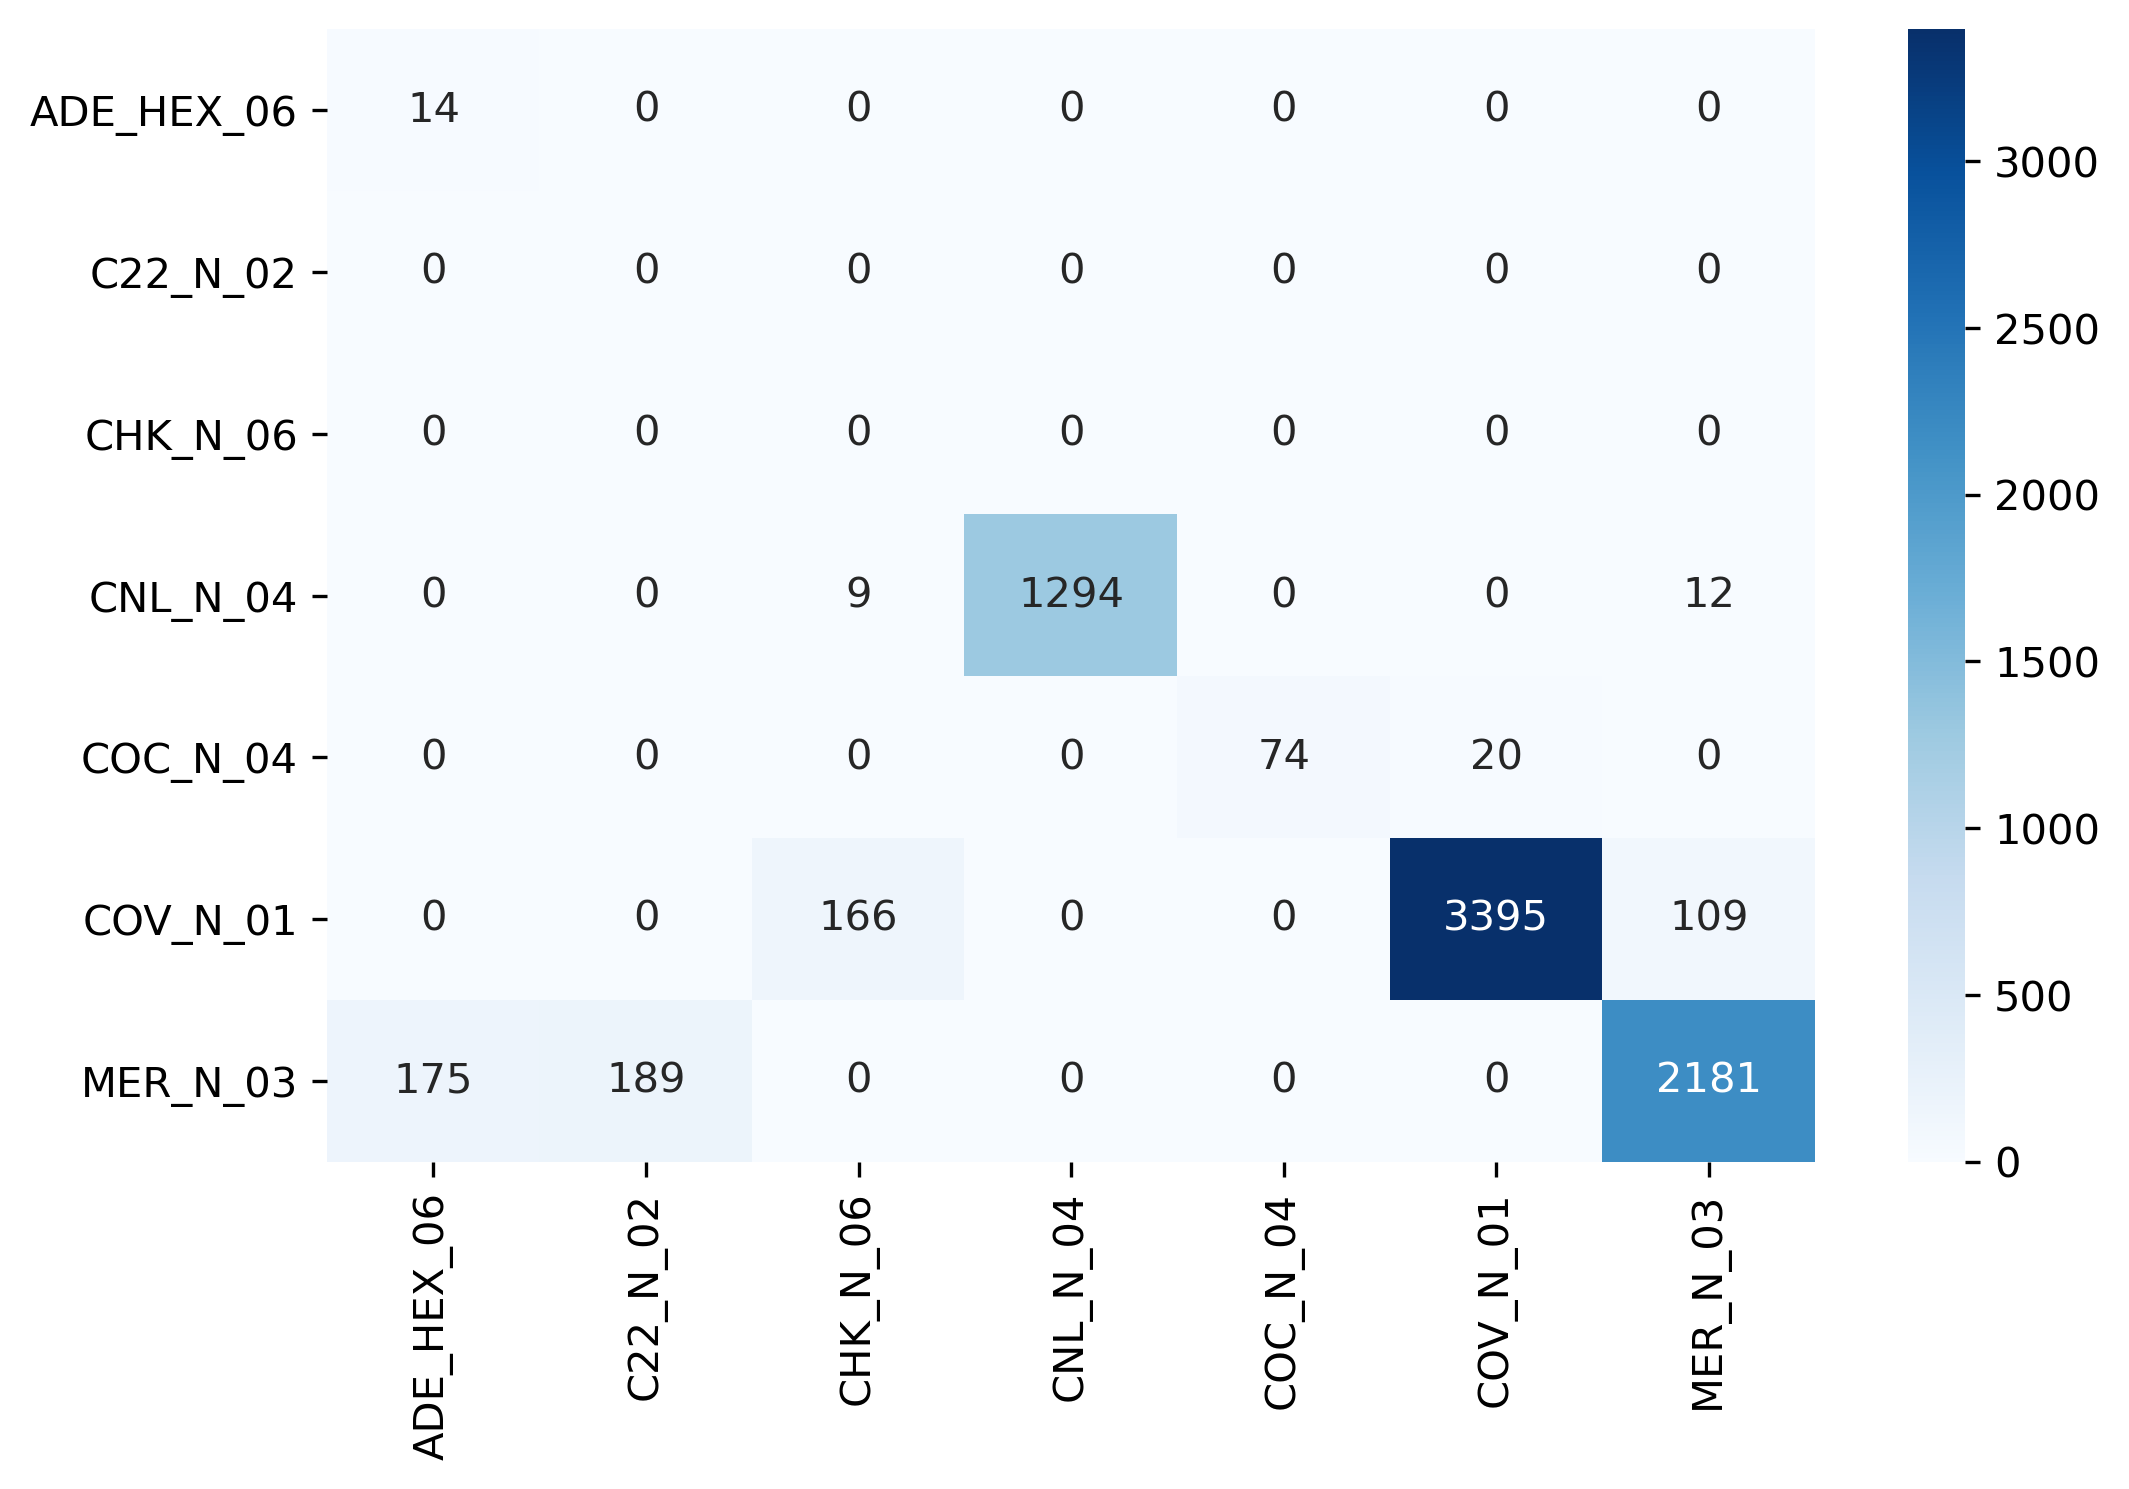

In [47]:
fig, ax = plt.subplots(1, 1, figsize=(8, 5), dpi=300)

ax = sns.heatmap(df_confusion_matrix, annot=True, fmt=".0f", cmap='Blues', annot_kws={"fontsize":10})
plt.show()

# fig.savefig(f'{figure_path}/confusion_matrix_well.pdf')

## Table with well counts

In [48]:
def classify_sample_level(df_train, df_test, NMETA, model):
    
    x_train = df_train.iloc[:, NMETA:]
    y_train = df_train['Assay'].values
    
    label_number = 7
    label = np.unique(y_train)
    
    sample_accuracy_list = []
    
    sample_list = []
    target_list = []
    
    for sample, df in df_test.groupby('Target'):
        x_test = df.iloc[:, NMETA:]
        y_test = df['Assay'].values
        
        np.where(label == df['Assay'].unique()[0])[0][0]
        
        model.fit(x_train, y_train)
        accuracy = model.score(x_test, y_test)
        y_pred = model.predict(x_test)
        
        confusionmatrix = np.zeros((label_number, label_number))
        confusionmatrix = np.add(confusionmatrix, confusion_matrix(y_test, y_pred, labels=label))
        
        sample_accuracy_list.append(confusionmatrix[np.where(label == df['Assay'].unique()[0])[0][0]])
        sample_list.append(sample)
        target_list.append(df['Assay'].unique()[0])
        
    df_accuracy = pd.DataFrame(sample_accuracy_list, columns=label)
    df_accuracy.insert(0, 'Sample', sample_list)
    df_accuracy.insert(1, 'Target', target_list)
        
    return df_accuracy

In [49]:
df_accuracy = classify_sample_level(df_train, df_test_diluted, NMETA, model)
df_accuracy['pred_label'] = df_accuracy.iloc[:, 2:].idxmax(axis=1)
df_accuracy

,Sample,Target,ADE_HEX_06,C22_N_02,CHK_N_06,CNL_N_04,COC_N_04,COV_N_01,MER_N_03,pred_label
0,COV_QC_1(diluted),COV_N_01,0.0,0.0,126.0,0.0,0.0,538.0,105.0,COV_N_01
1,COV_QC_2(diluted),COV_N_01,0.0,0.0,30.0,0.0,0.0,598.0,3.0,COV_N_01
2,COV_QC_3(diluted),COV_N_01,0.0,0.0,0.0,0.0,0.0,766.0,0.0,COV_N_01
3,COV_QC_4(diluted),COV_N_01,0.0,0.0,4.0,0.0,0.0,751.0,1.0,COV_N_01
4,COV_QC_5(diluted),COV_N_01,0.0,0.0,6.0,0.0,0.0,742.0,0.0,COV_N_01
5,MER_01_MER(diluted),MER_N_03,112.0,0.0,0.0,0.0,0.0,0.0,175.0,MER_N_03
6,MER_02_CNL(diluted),CNL_N_04,0.0,0.0,0.0,770.0,0.0,0.0,0.0,CNL_N_04
7,MER_03_MER(diluted),MER_N_03,0.0,27.0,0.0,0.0,0.0,0.0,743.0,MER_N_03
8,MER_05_MER(diluted),MER_N_03,0.0,161.0,0.0,0.0,0.0,0.0,609.0,MER_N_03
9,MER_06_MER(diluted),MER_N_03,57.0,1.0,0.0,0.0,0.0,0.0,640.0,MER_N_03


## Table with well percentage

In [50]:
df_accuracy_percentage = df_accuracy.copy()

for idx, row in df_accuracy.iterrows():
    summ = row.iloc[2:9].values.sum()
    x = row.iloc[2:9].values/summ*100
    x = x.astype(float)
    x = np.around(x,2)
    df_accuracy_percentage.iloc[idx, 2:9] = x

df_accuracy_percentage["confidence_level"] = df_accuracy_percentage.iloc[:,2:9].T.max()
# df_accuracy_percentage.to_csv(f'{data_selected_path}/M2M_data/df_accuracy_percentages.csv')

print(f"median accuracy = {df_accuracy_percentage['confidence_level'].median()}")
df_accuracy_percentage

median accuracy = 95.46000000000001


,Sample,Target,ADE_HEX_06,C22_N_02,CHK_N_06,CNL_N_04,COC_N_04,COV_N_01,MER_N_03,pred_label,confidence_level
0,COV_QC_1(diluted),COV_N_01,0.00,0.00,16.38,0.00,0.00,69.96,13.65,COV_N_01,69.96
1,COV_QC_2(diluted),COV_N_01,0.00,0.00,4.75,0.00,0.00,94.77,0.48,COV_N_01,94.77
2,COV_QC_3(diluted),COV_N_01,0.00,0.00,0.00,0.00,0.00,100.00,0.00,COV_N_01,100.00
3,COV_QC_4(diluted),COV_N_01,0.00,0.00,0.53,0.00,0.00,99.34,0.13,COV_N_01,99.34
4,COV_QC_5(diluted),COV_N_01,0.00,0.00,0.80,0.00,0.00,99.20,0.00,COV_N_01,99.20
5,MER_01_MER(diluted),MER_N_03,39.02,0.00,0.00,0.00,0.00,0.00,60.98,MER_N_03,60.98
6,MER_02_CNL(diluted),CNL_N_04,0.00,0.00,0.00,100.00,0.00,0.00,0.00,CNL_N_04,100.00
7,MER_03_MER(diluted),MER_N_03,0.00,3.51,0.00,0.00,0.00,0.00,96.49,MER_N_03,96.49
8,MER_05_MER(diluted),MER_N_03,0.00,20.91,0.00,0.00,0.00,0.00,79.09,MER_N_03,79.09
9,MER_06_MER(diluted),MER_N_03,8.17,0.14,0.00,0.00,0.00,0.00,91.69,MER_N_03,91.69


## Confusion matrix at SAMPLE LEVEL

In [51]:
label = df_train['Assay'].unique()

confusionmatrix = np.zeros((7, 7))
confusionmatrix = np.add(confusionmatrix, confusion_matrix(df_accuracy['Target'].values,
                                                                   df_accuracy['pred_label'].values, labels=label))

df_confusion_matrix = pd.DataFrame(confusionmatrix, columns=label, index=label)

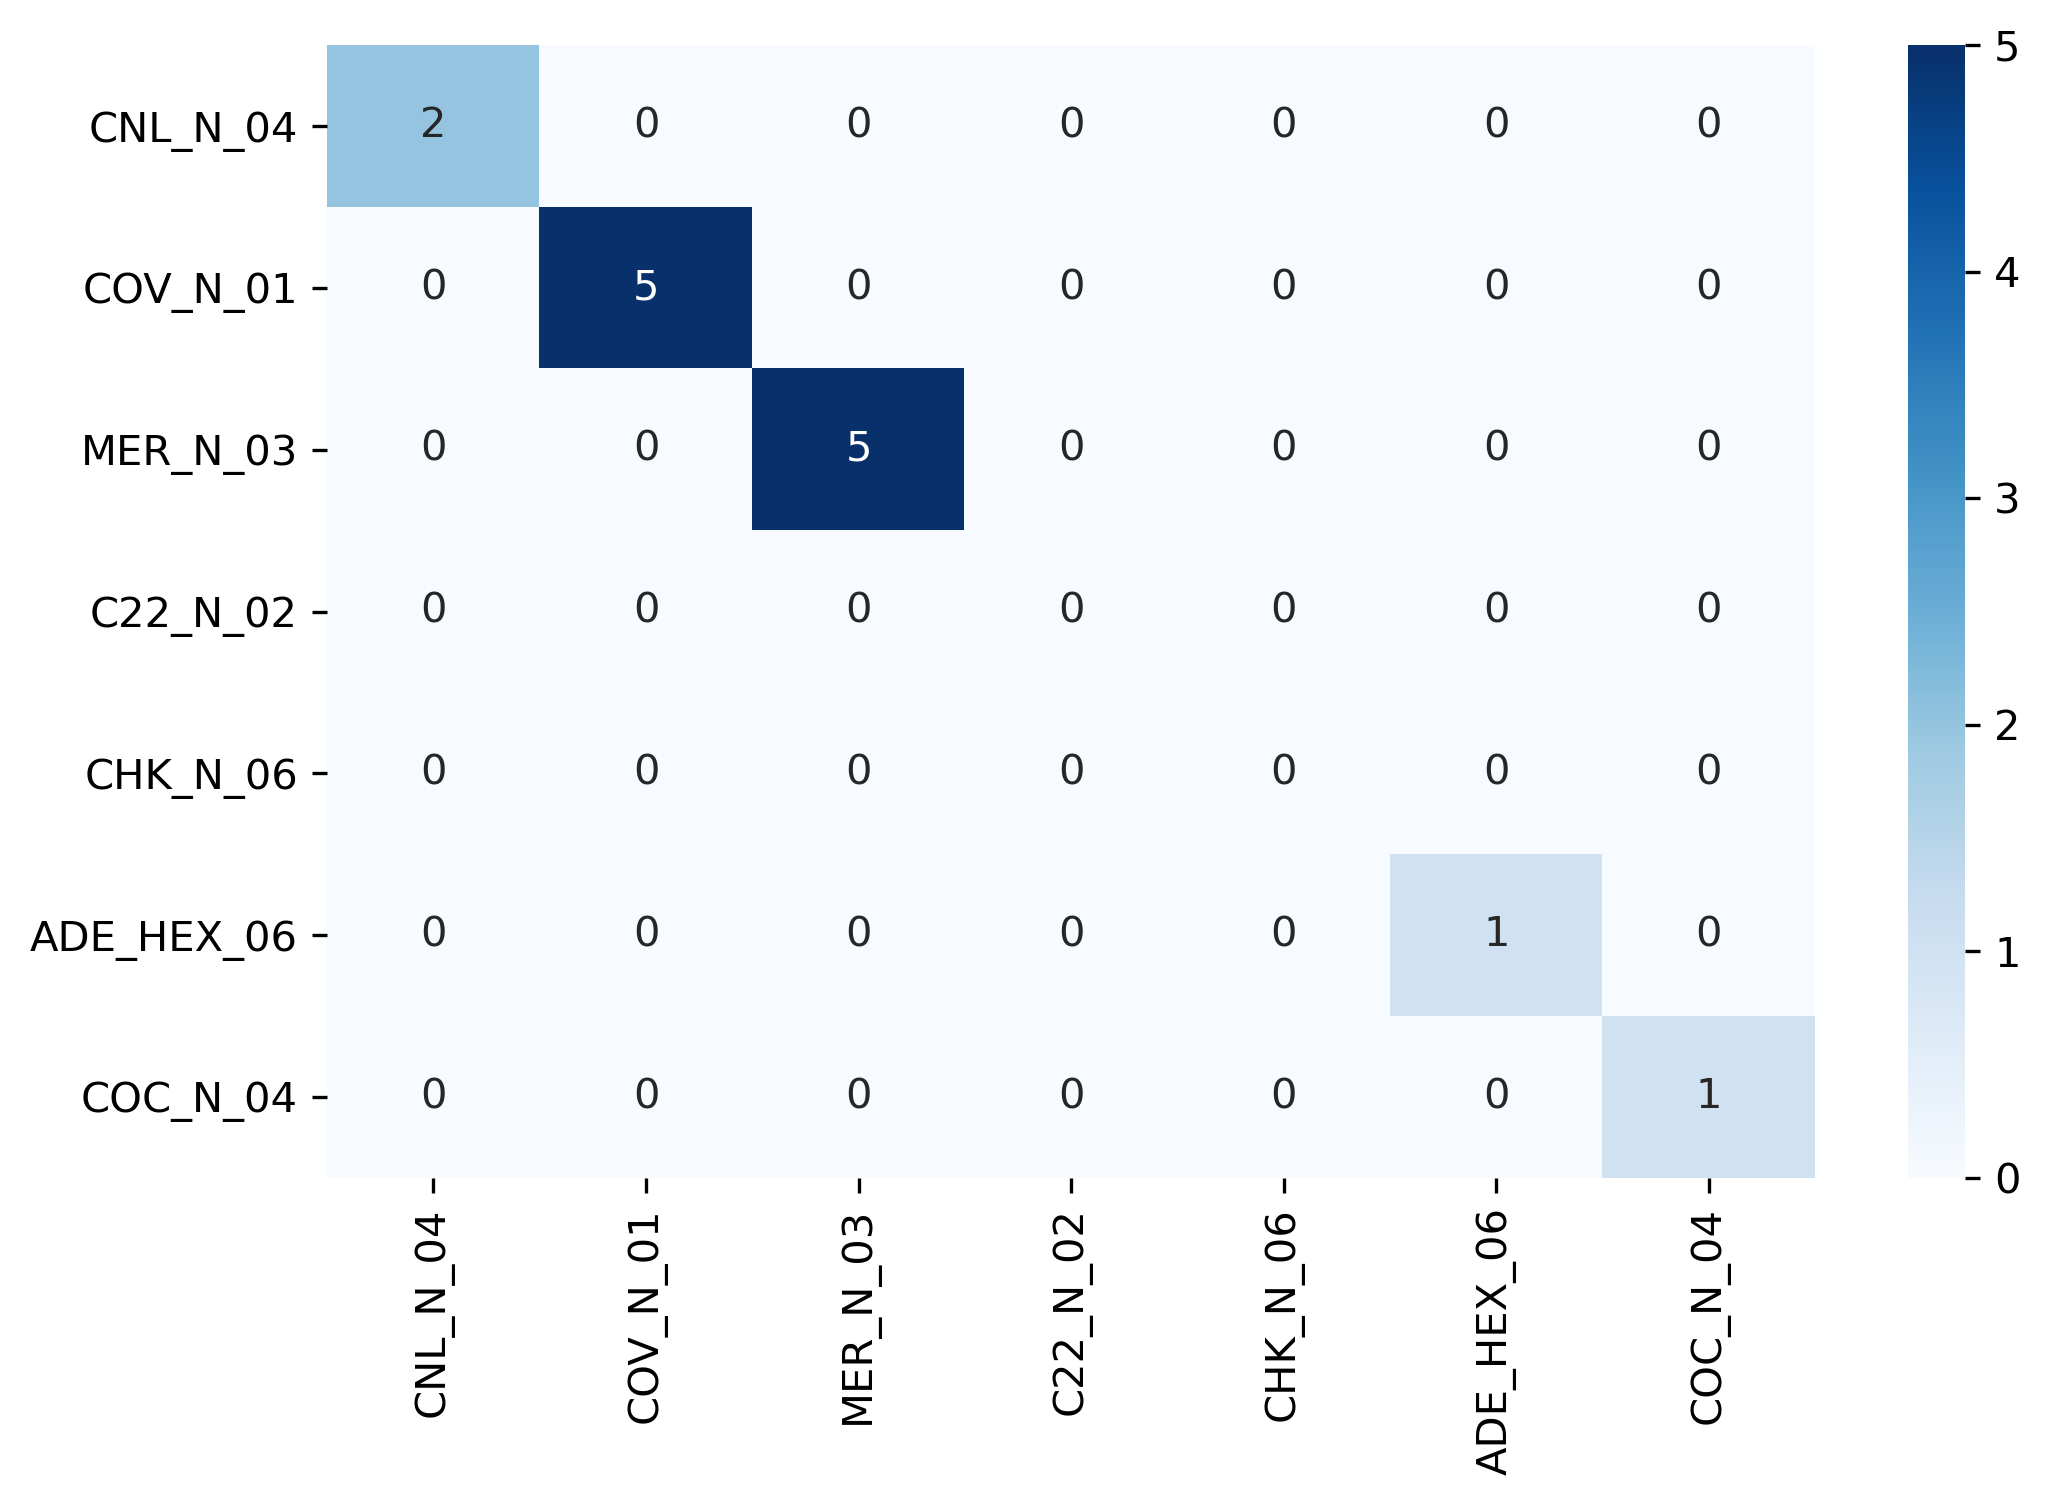

In [52]:
fig, ax = plt.subplots(1, 1, figsize=(8, 5), dpi=300)

ax = sns.heatmap(df_confusion_matrix, annot=True, fmt=".0f", cmap='Blues', annot_kws={"fontsize":10})

plt.show()
# fig.savefig(f'{figure_path}/confusion_matrix_sample.pdf')